In [1]:
!kaggle datasets download -d youssefelebiary/global-air-quality-2023-6-cities --unzip


  0%|          | 0.00/1.86M [00:00<?, ?B/s]
100%|██████████| 1.86M/1.86M [00:00<00:00, 379MB/s]


Dataset URL: https://www.kaggle.com/datasets/youssefelebiary/global-air-quality-2023-6-cities
License(s): MIT



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Air_Quality.csv')

In [5]:
df.sample(5)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
19310,2023-03-16 14:00:00+00:00,Dubai,490.0,104.5,16.5,41.0,22.4,48.3,67.210000
22673,2023-08-03 17:00:00+00:00,Dubai,465.0,40.9,17.9,135.0,64.3,177.0,100.898330
9601,2023-02-05 01:00:00+00:00,Cairo,512.0,68.5,56.9,7.0,22.5,45.1,33.766666
43736,2023-12-29 08:00:00+00:00,New York,316.0,37.8,9.1,1.0,11.8,16.9,18.900000
11939,2023-05-13 11:00:00+00:00,Cairo,161.0,10.7,29.1,120.0,18.0,25.8,53.333336


In [6]:
df.shape

(52560, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52560 non-null  object 
 1   City    52560 non-null  object 
 2   CO      52560 non-null  float64
 3   NO2     52560 non-null  float64
 4   SO2     52560 non-null  float64
 5   O3      52560 non-null  float64
 6   PM2.5   52560 non-null  float64
 7   PM10    52560 non-null  float64
 8   AQI     52560 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.6+ MB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,273.372565,28.930514,12.051645,55.304433,18.621792,35.505850,41.941352
std,171.578815,25.473936,14.684127,36.939938,15.897499,41.866614,24.989747
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.100000,8.000000
25%,160.000000,11.100000,2.500000,29.000000,7.100000,11.000000,22.638333
50%,224.000000,22.100000,5.800000,51.000000,13.400000,20.800000,32.400000
75%,335.000000,38.700000,17.300000,74.000000,24.900000,41.700000,61.013332
max,2145.000000,251.900000,200.800000,425.000000,143.400000,550.000000,188.319980


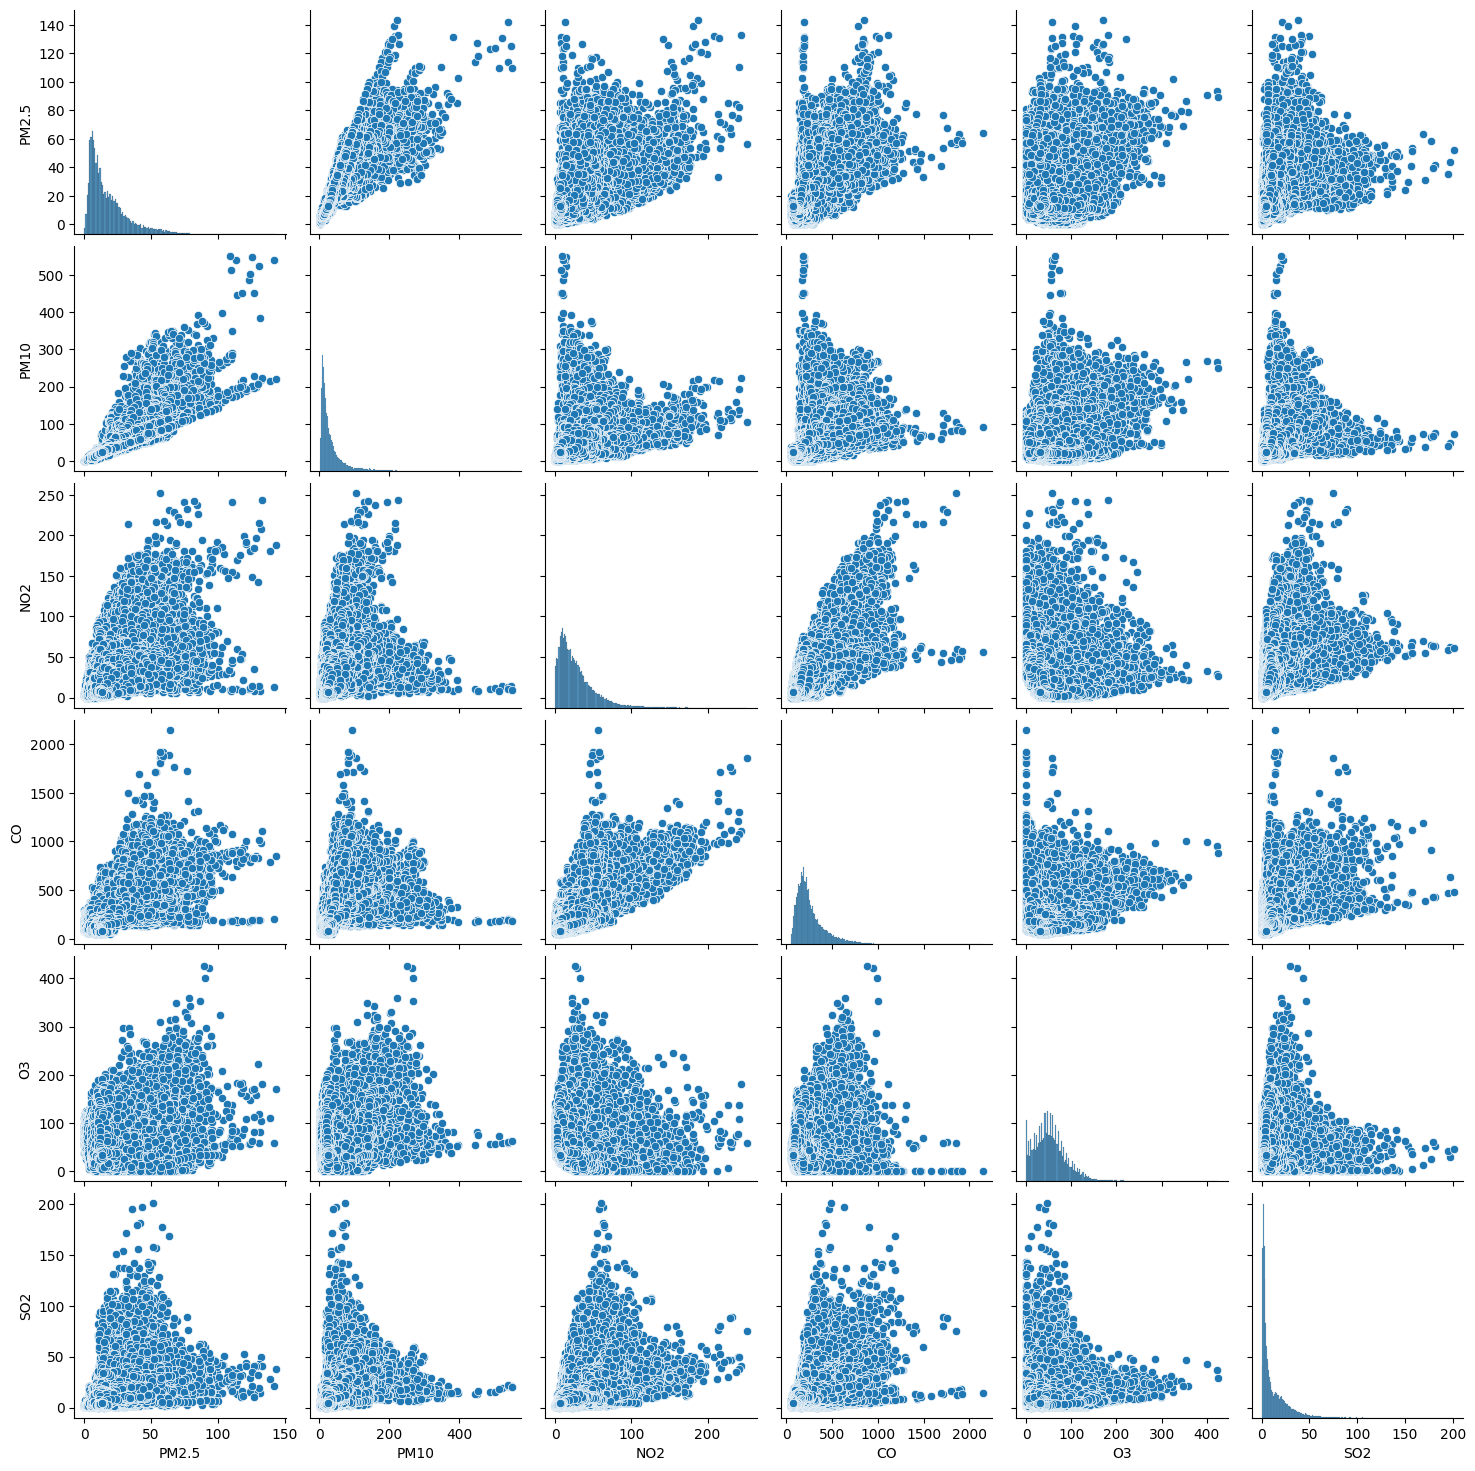

In [10]:
sns.pairplot(df[['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']])

<Axes: >

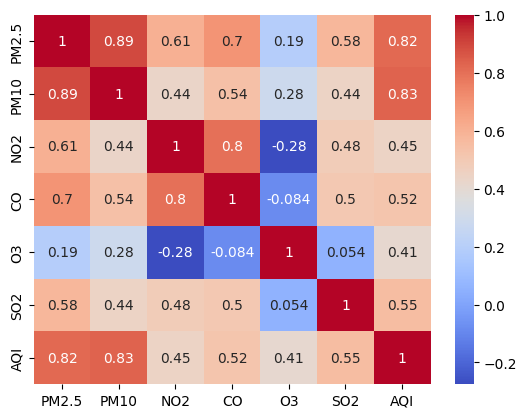

In [12]:
sns.heatmap(df[['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2','AQI']].corr(), annot=True, cmap='coolwarm')

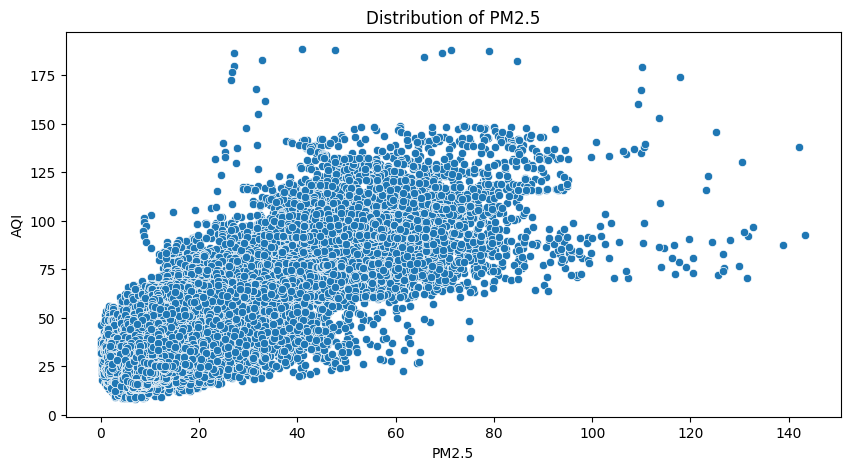

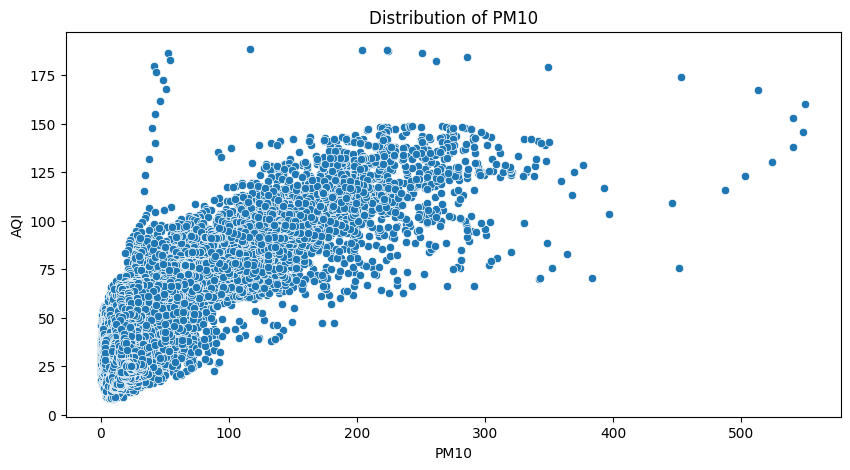

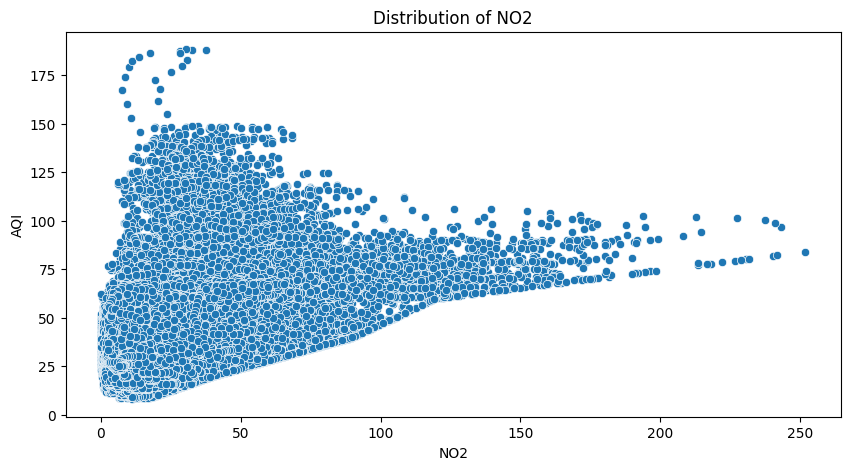

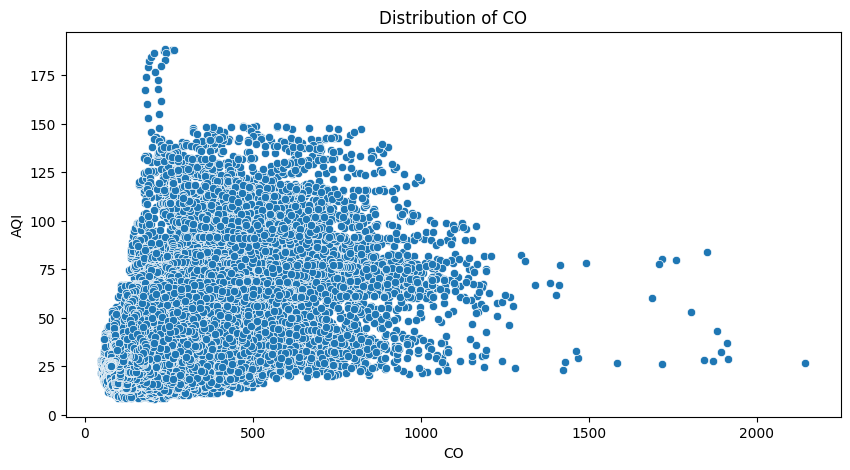

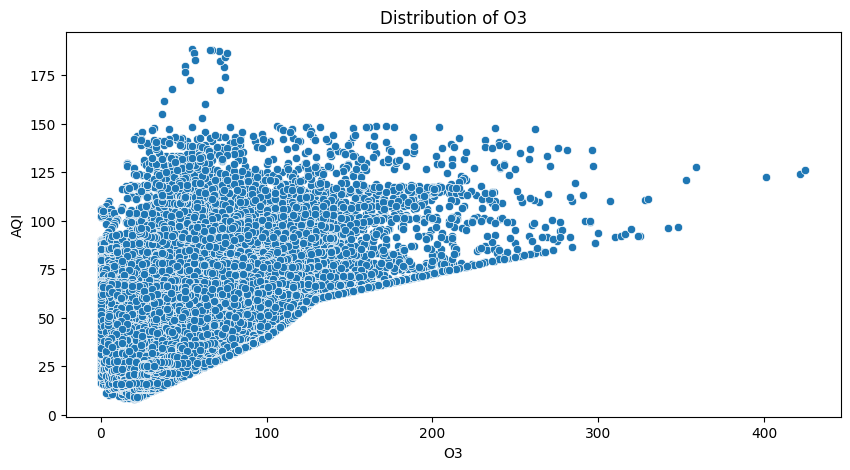

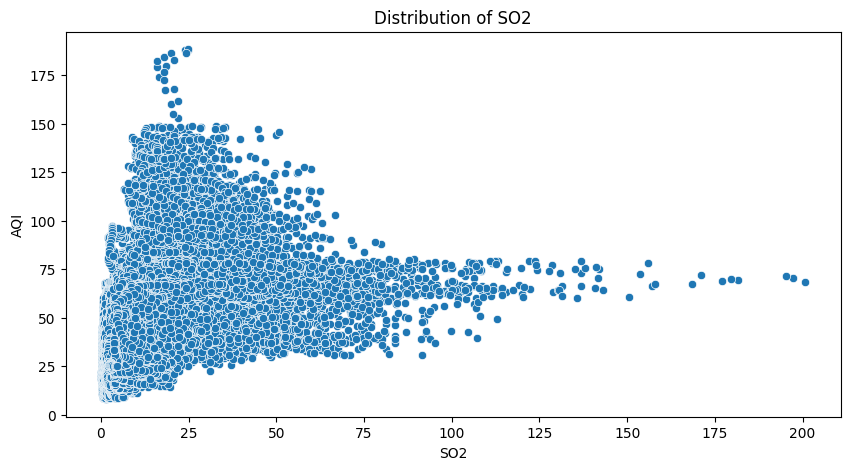

In [13]:
cols_to_plot = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']
for col in cols_to_plot:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=col, y='AQI', data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('AQI')
    plt.show()

## Data Preprocessing

In [15]:
X = df.drop(columns=['Date','AQI'])
y = df['AQI']

In [16]:
numeric_features = ['CO', 'NO2', 'O3', 'PM2.5', 'PM10','SO2']
categorical_features = ['City']

In [18]:
# Transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [22]:
X_encoded = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

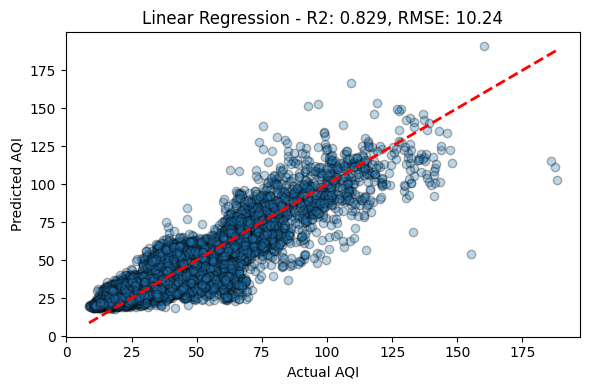

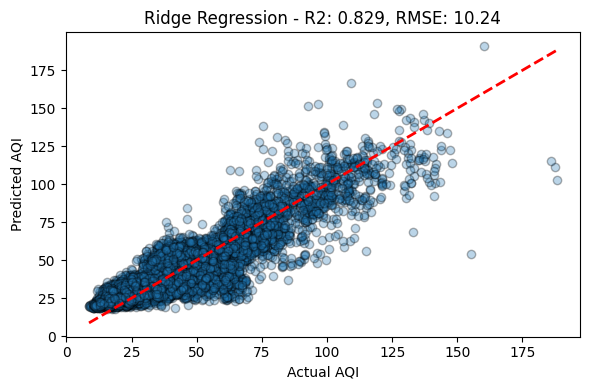

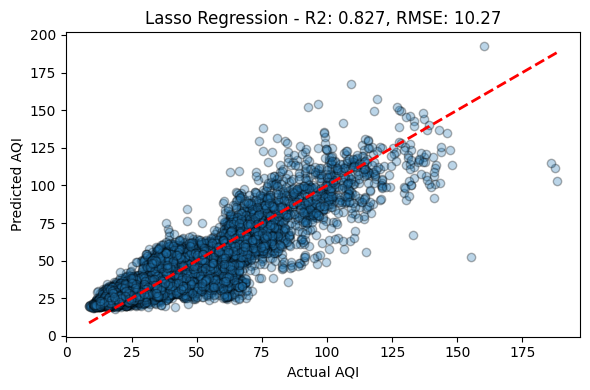

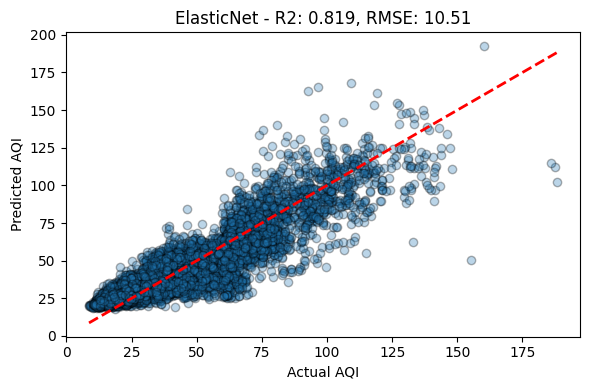

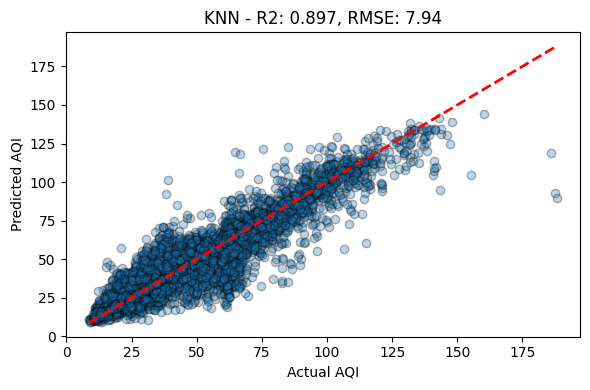

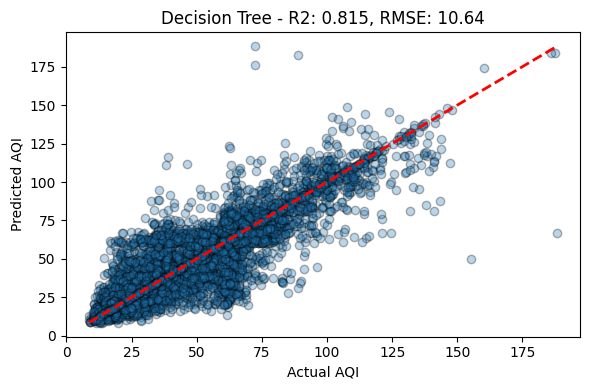

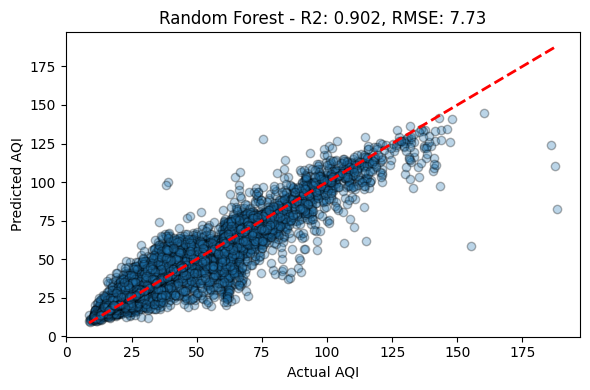

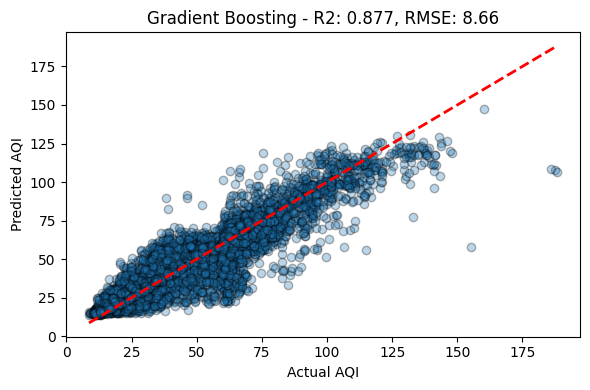

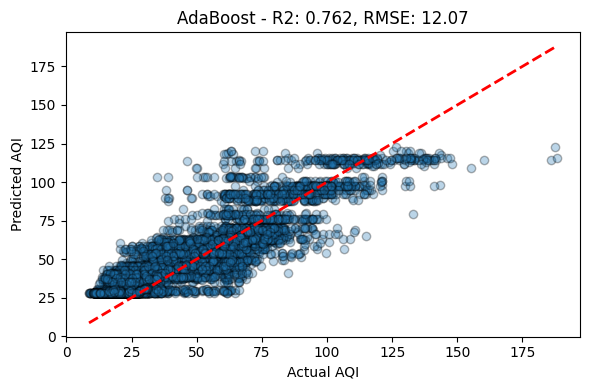

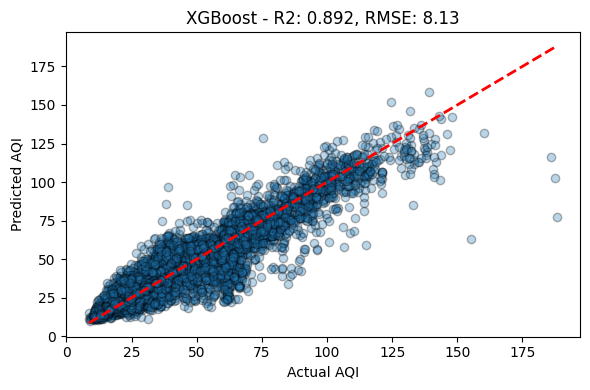

In [25]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE':mse,'RMSE': rmse, 'R2': r2}

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.3, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title(f'{name} - R2: {r2:.3f}, RMSE: {rmse:.2f}')
    plt.tight_layout()
    plt.show()

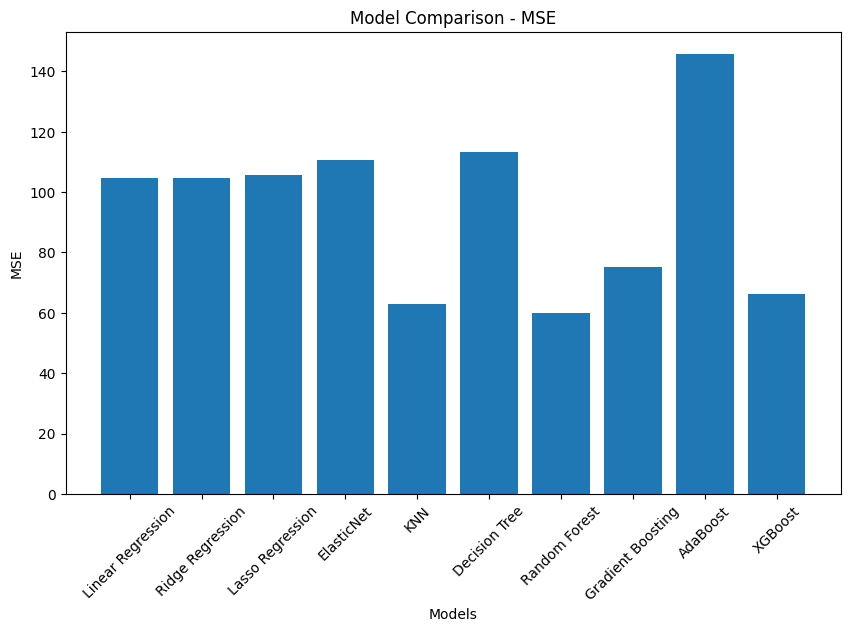

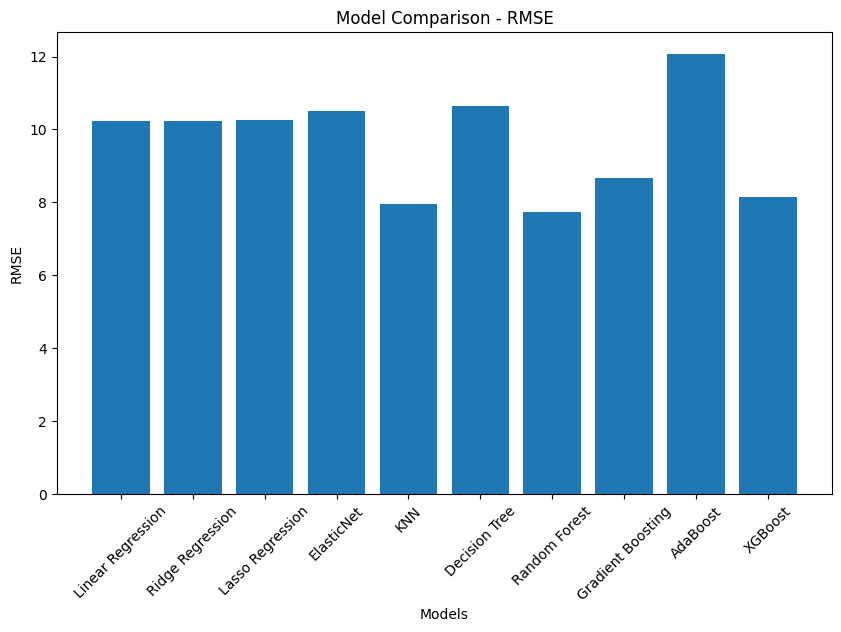

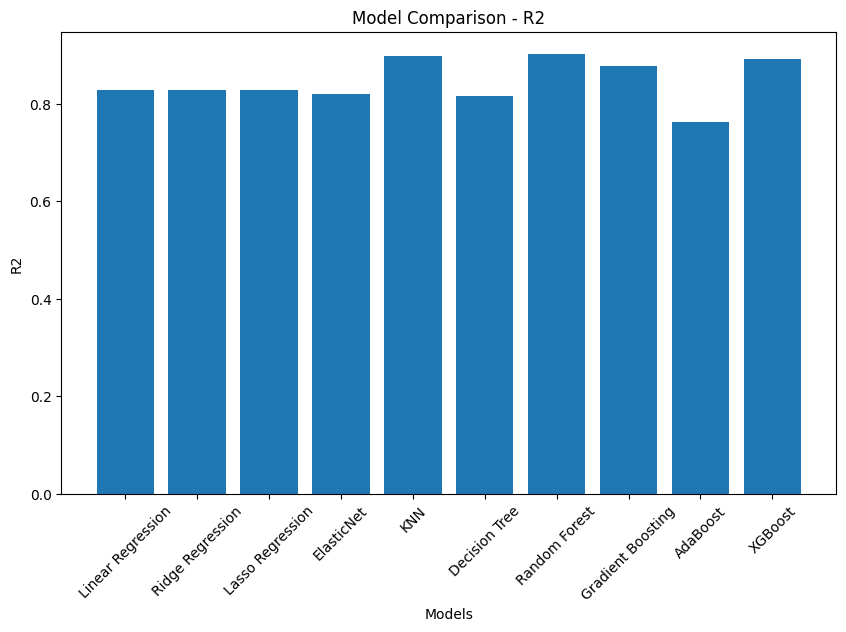

In [27]:
metrics = ['MSE', 'RMSE', 'R2']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(list(results.keys()), [results[name][metric] for name in results.keys()])
    plt.xticks(rotation=45)
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'Model Comparison - {metric}')
    plt.show()

In [28]:
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]
print(f"The best model is: {best_model_name} with R2: {results[best_model_name]['R2']:.3f} and RMSE: {results[best_model_name]['RMSE']:.2f}")

The best model is: Random Forest with R2: 0.902 and RMSE: 7.73
